In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas

In [89]:
Lakes = geopandas.read_file("Lakes")
City = geopandas.read_file("City_Limits")
Streets = geopandas.read_file("Street_Centerlines")
Parks = geopandas.read_file("Parks")

In [90]:
with open("Location_Years.csv") as f:
    location = pd.read_csv(f)
df = location[['Lat', "Lon"]]
with open("policestations.csv") as f:
    stations = pd.read_csv(f)

In [91]:
new_columns = stations.columns.to_list()
new_columns[0] = 'X'
stations.columns = new_columns

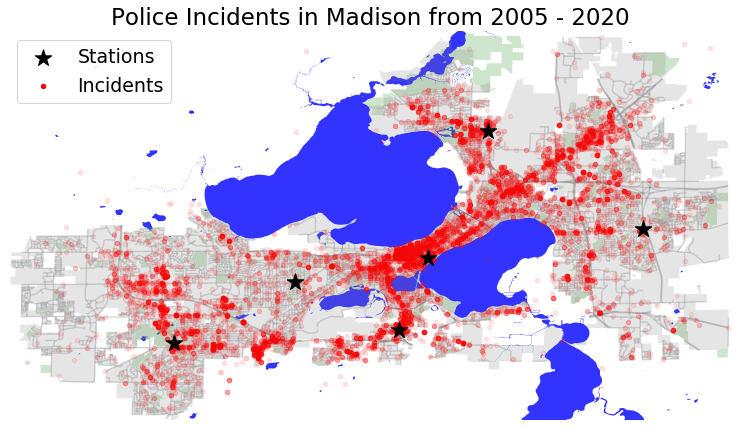

In [92]:
fig,ax = plt.subplots(figsize=(13, 13))

stat = stations.plot.scatter(x = 'X', y = "Y", color = 'Black', alpha = 1, zorder = 3, marker = "*", ax = ax,s = 300)
incid = df.plot.scatter(x = 'Lon', y = 'Lat',color = 'Red', alpha = 0.1, zorder= 2, ax = ax)

Streets.plot(color = 'gray', alpha = 0.3, zorder = 0, ax = ax)
City.plot(color = 'grey', alpha = 0.2, zorder =-1, ax = ax)
Parks.plot(color = 'green', alpha = 0.2, zorder = -2, ax = ax)
Lakes.plot(color="blue", alpha=0.8, zorder=-3,ax = ax)


ax.set_title("Police Incidents in Madison from 2005 - 2020", fontsize = 23)

ax.set_ylim((42.999, 43.175))
ax.set_xlim((-89.573, -89.245))
ax.set_yticklabels([]) # https://stackoverflow.com/questions/37039685/hide-axis-values-but-keep-axis-tick-labels-in-matplotlib
ax.set_xticklabels([]) # taken from tmdavison
ax.set_xticks([], minor = False)
ax.set_yticks([], minor = False)
ax.axis('Off')

legend = plt.legend(['Stations', "Incidents"], prop={'size': 19})
for lh in legend.legendHandles: 
    lh.set_alpha(1)
#plt.savefig("OverallPoliceIncident20052020.png", bbox_inches = None)
None